<a href="https://colab.research.google.com/github/WilliamSawran/ABC/blob/master/HW4_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<!DOCTYPE html>
<html>
<body>

**<h2>Task 1 K-Means Clustering Algorithm, Manhattan Distance, Euclidean Distance, Centroids of Clusters: </h2>**

**<p>Suppose we have 10 college football teams X1 to X10. We want to cluster them into 2 groups. For each football team, we have two features: One is # wins in Season 2016, and the other is # wins in Season 2017.</p>**

**<h3>(1)  Initialize with two centroids, (4, 6) and (5, 4). Use Manhattan distance as the distance metric.First, perform one iteration of the K-means algorithm and report the coordinates of the resulting centroids. Second, please use K-Means to find two clusters.</h3>**

**<h3>(2) Initialize with two centroids, (4, 6) and (5, 4). Use Euclidean distance as the distance metric.  First, perform one iteration of the K-means algorithm and report the coordinates of the resulting centroids. Second, please use K-Means to find two clusters.</h3>**

**<h3>(3) Initialize with two centroids, (3, 3) and (8, 3). Use Manhattan distance as the distance metric.  First, perform one iteration of the K-means algorithm and report the coordinates of the resulting centroids. Second, please use K-Means to find two clusters.</h3>**

**<h3>(4) Initialize with two centroids, (3, 2) and (4, 8). Use Manhattan distance as the distance metric. First, perform one iteration of the K-means algorithm and report the coordinates of the resulting centroids. Second, please use K-Means to find two clusters.</h3>**

</body>
</html>

In [136]:
#@title Import libraries
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from scipy.spatial import distance
from scipy.spatial.distance import jaccard
%matplotlib inline

In [137]:
#@title Create & print data points

# Print multiple objects to screen in same shell 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

data = {'# wins in Season 2016': [3, 3, 2, 2, 6, 6, 7, 7, 8, 7], '# wins in Season 2017': [5, 4, 8, 3, 2, 4, 3, 4, 5, 6]}
df = pd.DataFrame(data=data, index=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10'])
df.index.name = 'Team'

data = np.array([[3, 5],
              [3, 4],
              [2, 8 ],
              [2, 3],
              [6, 2],
              [6, 4],
              [7, 3],
              [7, 4],
              [8, 5],
              [7, 6]])

# Show df
df
print()

# Show df shape
df.shape

,# wins in Season 2016,# wins in Season 2017
Team,,
x1,3,5
x2,3,4
x3,2,8
x4,2,3
x5,6,2
x6,6,4
x7,7,3
x8,7,4
x9,8,5


(10, 2)

Teams Based on Wins in Season 16 & 17



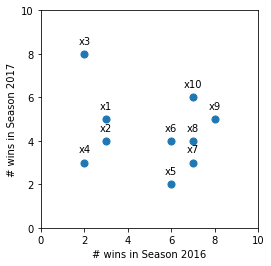

In [138]:
#@title Create & print data points

print("Teams Based on Wins in Season 16 & 17\n")

# scatter plot
plt.scatter(df['# wins in Season 2016'].values, df['# wins in Season 2017'].values, s = 50)

# zip joins x and y coordinates in pairs
for label,x,y in zip(df.index, df['# wins in Season 2016'].values,df['# wins in Season 2017'].values):

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.ylim(0, 10)
plt.xlim(0, 10)
plt.gca().set_aspect('equal')
plt.xlabel('# wins in Season 2016')
plt.ylabel('# wins in Season 2017')
plt.show();

In [139]:
#@title Implement K-Means Algorithm

# First, let's build our K Means class
class K_Means:
    def __init__(self, k=2, distance_metric='euclidean', tolerance=0.001, max_iterations=300, seed = None, centroid_initializations = None):
        self.k = k                              # k is the number of centroids/clusters
        self.distance_metric = distance_metric  # distance_metric calculates distances of the features to the current centroids
        self.tolerance = tolerance              # tolerance allows us to say we're optimized if the centroid is not moving more than the tolerance value
        self.max_iterations = max_iterations    # max_iterations is the number of cycles/iterations the algorithm is going to run
        self.seed = seed
        self.centroid_initializations = centroid_initializations # centroid_initializations contains the locations to which the centroids will be initialized
        self.centroids = []
    
    def fit(self,data):                                     # It is here in the fit function where the data will be passed

        n_row, n_col = data.shape                              # Get dimensions of the data
        #print('number of rows = '.format(n_row))
        #df['tuples'] = df[['# wins in Season 2016','# wins in Season 2017']].apply(tuple, axis=1)

        if self.centroid_initializations is not None: 
            for i in range(self.k):
                self.centroids.append(self.centroid_initializations[i]) # Assign starting centroids to be the locations in self.centroid_initializations
        elif self.seed is not None: 
            np.random.seed(self.seed) # randomly choose k data points as initial centroids
            rand_indices = np.random.choice(n_row, size = self.k)
            for i, rand_index in enumerate(rand_indices):
                #print (i, rand_index)
                self.centroids.append(data[rand_index]) # Create empty dictionary to store the k centroidsprint(centroids)
                #print(self.centroids)
        else:
            rand_indices = np.random.choice(n_row, size = self.k)
            for i, rand_index in enumerate(rand_indices):
                #print (i, rand_index)
                self.centroids.append(data[rand_index]) # Create empty dictionary to store the k centroidsprint(centroids)
                #print(self.centroids)


        for i in range(self.max_iterations):  # Iterate through all max iterations
                #if(i % 50 == 0 ):
                    #print(i)
                distances_to_centroids = pairwise_distances(data, self.centroids, metric = self.distance_metric) # Calculate distances of the features to the current centroids
                cluster_assignment = np.argmin(distances_to_centroids, axis = 1)   # Classify them                                   
                new_centroids = np.array([data[cluster_assignment == i].mean(axis = 0) for i in range(self.k)])
                #print(new_centroids)
                # if the updated centroid is still the same, then the algorithm has converged
                if np.all(self.centroids == new_centroids):
                    break
                self.centroids = new_centroids
          
        #SSE = computeSSE(data, cluster_assignment)

        return self.centroids, cluster_assignment

    def predict(self,data):
        distances = distances_to_centroids = pairwise_distances(data, centroids, metric = 'euclidean')
        classification = distances.index(min(distances))
        return classification
"""
    def euclidean(instance1, instance2):
        if instance1 == None or instance2 == None:
            return float("inf")
        sumOfSquares = 0
        for i in range(1, len(instance1)):
            sumOfSquares += (instance1[i] - instance2[i])**2
        return sqrt(sumOfSquares)
    
    def jaccard(instance1, instance2):
        if instance1 == None or instance2 == None:
            return float("inf")
        intersection = set(instance1).intersection(instance2)
        union = set().union(instance1, instance2)
        return 1 - (len(intersection) / len(union))
"""

def computeSSE(data, cluster_assignment, centroids):
    sse = 0.0
    for i in range(len(data)):
        dst0 = distance.euclidean(centroids[0], data[i])
        dst1 = distance.euclidean(centroids[1], data[i])
        dst2 = distance.euclidean(centroids[2], data[i])
        dst_to_closest_centroid_squared = (min(dst0, dst1, dst2))**2
        sse += dst_to_closest_centroid_squared
    return sse

'\n    def euclidean(instance1, instance2):\n        if instance1 == None or instance2 == None:\n            return float("inf")\n        sumOfSquares = 0\n        for i in range(1, len(instance1)):\n            sumOfSquares += (instance1[i] - instance2[i])**2\n        return sqrt(sumOfSquares)\n    \n    def jaccard(instance1, instance2):\n        if instance1 == None or instance2 == None:\n            return float("inf")\n        intersection = set(instance1).intersection(instance2)\n        union = set().union(instance1, instance2)\n        return 1 - (len(intersection) / len(union))\n'

<!DOCTYPE html>
<html>
<body>

**<h3>(1)  Initialize with two centroids, (4, 6) and (5, 4). Use Manhattan distance as the distance metric.First, perform one iteration of the K-means algorithm and report the coordinates of the resulting centroids. Second, please use K-Means to find two clusters.</h3>**

</body>
</html>

In [140]:
#@title Initialize with two centroids, (4, 6) and (5, 4). Use Manhattan distance as the distance metric. First, perform one iteration of the K-means algorithm and report the coordinates of the resulting centroids
# Specify model parameters
distance_metric = 'manhattan'
max_iterations = 1
centroid_initializations = [[4, 6], [5, 4]]

# Peform K-Means algorithm on data with specified parameters
clf = K_Means(k=2, distance_metric=distance_metric, tolerance=0.001, max_iterations=max_iterations, seed=None, centroid_initializations = centroid_initializations)
centroids, cluster_assignment = clf.fit(data)

# Print coordinates of the resulting centroids
print("Coordinates of the Centroids After {max_iterations} Iteration of the K-Means Algorithm Using K = 2, {distance_metric} distance and centroid initializations: {centroid_initializations}:".format(max_iterations=max_iterations, distance_metric = distance_metric, centroid_initializations = centroid_initializations))
centroids_df = pd.DataFrame(data=centroids, index=['Centroid #1', 'Centroid #2']) 
centroids_df.columns =['# wins in Season 2016', '# wins in Season 2017']
print("")
print(centroids_df.round(0).astype(int))

Coordinates of the Centroids After 1 Iteration of the K-Means Algorithm Using K = 2, manhattan distance and centroid initializations: [[4, 6], [5, 4]]:

             # wins in Season 2016  # wins in Season 2017
Centroid #1                      4                      6
Centroid #2                      6                      4


Coordinates of the Centroids After 1000 Iterations of the K-Means Algorithm 
Using K = 2, manhattan distance and centroid initializations: [[4, 6], [5, 4]]:

             # wins in Season 2016  # wins in Season 2017
Centroid #1                      4                      6
Centroid #2                      6                      4

___________________________________________________________________________________


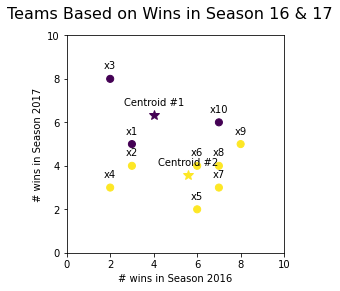

In [141]:
#@title Apply K-Means on teams to form two clusters

# Specify model parameters
distance_metric = 'manhattan'
max_iterations = 1000
centroid_initializations = [[4, 6], [5, 4]]

# Peform K-Means algorithm on data with specified parameters
clf = K_Means(k=2, distance_metric=distance_metric, tolerance=0.001, max_iterations=max_iterations, seed=None, centroid_initializations = centroid_initializations)
centroids, cluster_assignment = clf.fit(data)

# Print coordinates of the resulting centroids
print("Coordinates of the Centroids After {max_iterations} Iterations of the K-Means Algorithm \nUsing K = 2, {distance_metric} distance and centroid initializations: {centroid_initializations}:".format(max_iterations=max_iterations, distance_metric = distance_metric, centroid_initializations = centroid_initializations))
centroids_df = pd.DataFrame(data=centroids, index=['Centroid #1', 'Centroid #2']) 
centroids_df.columns =['# wins in Season 2016', '# wins in Season 2017']
print("")
print(centroids_df.round(0).astype(int))
print("")
print("___________________________________________________________________________________")

# plot the cluster and cluster's centroid
plt.scatter(data[:, 0], data[:, 1], s = 50, c = cluster_assignment, cmap = 'viridis')
centroid_1 = centroids_df.iloc[0]
centroid_2 = centroids_df.iloc[1]
plt.plot(centroid_1[0], centroid_1[1], marker='*', markersize=10, color="#440154ff")
plt.annotate("Centroid #1", # this is the text
                 (centroid_1[0],centroid_1[1]), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.plot(centroid_2[0], centroid_2[1], marker='*', markersize=10, color="#fde725ff")
plt.annotate("Centroid #2", # this is the text
                 (centroid_2[0],centroid_2[1]), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
                 # zip joins x and y coordinates in pairs

for label,x,y in zip(df.index, df['# wins in Season 2016'].values,df['# wins in Season 2017'].values):

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.ylim(0, 10)
plt.xlim(0, 10)
plt.gca().set_aspect('equal')
plt.suptitle("Teams Based on Wins in Season 16 & 17\n", fontsize=16)
plt.xlabel('# wins in Season 2016')
plt.ylabel('# wins in Season 2017')
plt.show();

In [142]:
#@title Report cluster assignments

kmeans_cluster_assignment = {'K-Means Cluster Assignment': cluster_assignment}
df_cluster_assignment = pd.DataFrame(data=kmeans_cluster_assignment, index=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10'])
df.index.name = 'Team'
print(df_cluster_assignment)

     K-Means Cluster Assignment
x1                            0
x2                            1
x3                            0
x4                            1
x5                            1
x6                            1
x7                            1
x8                            1
x9                            1
x10                           0


<!DOCTYPE html>
<html>
<body>

**<h3>(2) Initialize with two centroids, (4, 6) and (5, 4). Use Euclidean distance as the distance metric.  First, perform one iteration of the K-means algorithm and report the coordinates of the resulting centroids. Second, please use K-Means to find two clusters.</h3>**

</body>
</html>

In [143]:
#@title Initialize with two centroids, (4, 6) and (5, 4). Use Euclidean distance as the distance metric. First, perform one iteration of the K-means algorithm and report the coordinates of the resulting centroids
# Specify model parameters
distance_metric = 'euclidean'
max_iterations = 1
centroid_initializations = [[4, 6], [5, 4]]

# Peform K-Means algorithm on data with specified parameters
clf = K_Means(k=2, distance_metric=distance_metric, tolerance=0.001, max_iterations=max_iterations, seed=None, centroid_initializations = centroid_initializations)
centroids, cluster_assignment = clf.fit(data)

# Print coordinates of the resulting centroids
print("Coordinates of the Centroids After {max_iterations} Iteration of the K-Means Algorithm Using K = 2, {distance_metric} distance and centroid initializations: {centroid_initializations}:".format(max_iterations=max_iterations, distance_metric = distance_metric, centroid_initializations = centroid_initializations))
centroids_df = pd.DataFrame(data=centroids, index=['Centroid #1', 'Centroid #2']) 
centroids_df.columns =['# wins in Season 2016', '# wins in Season 2017']
print("")
print(centroids_df.round(0).astype(int))

Coordinates of the Centroids After 1 Iteration of the K-Means Algorithm Using K = 2, euclidean distance and centroid initializations: [[4, 6], [5, 4]]:

             # wins in Season 2016  # wins in Season 2017
Centroid #1                      2                      6
Centroid #2                      6                      4


Coordinates of the Centroids After 1000 Iterations of the K-Means Algorithm 
Using K = 2, euclidean distance and centroid initializations: [[4, 6], [5, 4]]:

             # wins in Season 2016  # wins in Season 2017
Centroid #1                      2                      5
Centroid #2                      7                      4

___________________________________________________________________________________


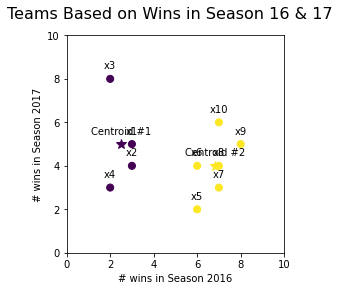

In [144]:
#@title Apply K-Means on teams to form two clusters

# Specify model parameters
distance_metric = 'euclidean'
max_iterations = 1000
centroid_initializations = [[4, 6], [5, 4]]

# Peform K-Means algorithm on data with specified parameters
clf = K_Means(k=2, distance_metric=distance_metric, tolerance=0.001, max_iterations=max_iterations, seed=None, centroid_initializations = centroid_initializations)
centroids, cluster_assignment = clf.fit(data)

# Print coordinates of the resulting centroids
print("Coordinates of the Centroids After {max_iterations} Iterations of the K-Means Algorithm \nUsing K = 2, {distance_metric} distance and centroid initializations: {centroid_initializations}:".format(max_iterations=max_iterations, distance_metric = distance_metric, centroid_initializations = centroid_initializations))
centroids_df = pd.DataFrame(data=centroids, index=['Centroid #1', 'Centroid #2']) 
centroids_df.columns =['# wins in Season 2016', '# wins in Season 2017']
print("")
print(centroids_df.round(0).astype(int))
print("")
print("___________________________________________________________________________________")

# plot the cluster and cluster's centroid
plt.scatter(data[:, 0], data[:, 1], s = 50, c = cluster_assignment, cmap = 'viridis')
centroid_1 = centroids_df.iloc[0]
centroid_2 = centroids_df.iloc[1]
plt.plot(centroid_1[0], centroid_1[1], marker='*', markersize=10, color="#440154ff")
plt.annotate("Centroid #1", # this is the text
                 (centroid_1[0],centroid_1[1]), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.plot(centroid_2[0], centroid_2[1], marker='*', markersize=10, color="#fde725ff")
plt.annotate("Centroid #2", # this is the text
                 (centroid_2[0],centroid_2[1]), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
                 # zip joins x and y coordinates in pairs

for label,x,y in zip(df.index, df['# wins in Season 2016'].values,df['# wins in Season 2017'].values):

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.ylim(0, 10)
plt.xlim(0, 10)
plt.gca().set_aspect('equal')
plt.suptitle("Teams Based on Wins in Season 16 & 17\n", fontsize=16)
plt.xlabel('# wins in Season 2016')
plt.ylabel('# wins in Season 2017')
plt.show();

In [145]:
#@title Report cluster assignments

kmeans_cluster_assignment = {'K-Means Cluster Assignment': cluster_assignment}
df_cluster_assignment = pd.DataFrame(data=kmeans_cluster_assignment, index=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10'])
df.index.name = 'Team'
print(df_cluster_assignment)

     K-Means Cluster Assignment
x1                            0
x2                            0
x3                            0
x4                            0
x5                            1
x6                            1
x7                            1
x8                            1
x9                            1
x10                           1


<!DOCTYPE html>
<html>
<body>

**<h3>(3) Initialize with two centroids, (3, 3) and (8, 3). Use Manhattan distance as the distance metric.  First, perform one iteration of the K-means algorithm and report the coordinates of the resulting centroids. Second, please use K-Means to find two clusters.</h3>**

</body>
</html>

In [146]:
#@title Initialize with two centroids, (3, 3) and (8, 3). Use Manhattan distance as the distance metric. First, perform one iteration of the K-means algorithm and report the coordinates of the resulting centroids
# Specify model parameters
distance_metric = 'manhattan'
max_iterations = 1
centroid_initializations = [[3, 3], [8, 3]]

# Peform K-Means algorithm on data with specified parameters
clf = K_Means(k=2, distance_metric=distance_metric, tolerance=0.001, max_iterations=max_iterations, seed=None, centroid_initializations = centroid_initializations)
centroids, cluster_assignment = clf.fit(data)

# Print coordinates of the resulting centroids
print("Coordinates of the Centroids After {max_iterations} Iteration of the K-Means Algorithm Using K = 2, {distance_metric} distance and centroid initializations: {centroid_initializations}:".format(max_iterations=max_iterations, distance_metric = distance_metric, centroid_initializations = centroid_initializations))
centroids_df = pd.DataFrame(data=centroids, index=['Centroid #1', 'Centroid #2']) 
centroids_df.columns =['# wins in Season 2016', '# wins in Season 2017']
print("")
print(centroids_df.round(0).astype(int))

Coordinates of the Centroids After 1 Iteration of the K-Means Algorithm Using K = 2, manhattan distance and centroid initializations: [[3, 3], [8, 3]]:

             # wins in Season 2016  # wins in Season 2017
Centroid #1                      2                      5
Centroid #2                      7                      4


Coordinates of the Centroids After 1000 Iterations of the K-Means Algorithm 
Using K = 2, manhattan distance and centroid initializations: [[3, 3], [8, 3]]:

             # wins in Season 2016  # wins in Season 2017
Centroid #1                      2                      5
Centroid #2                      7                      4

___________________________________________________________________________________


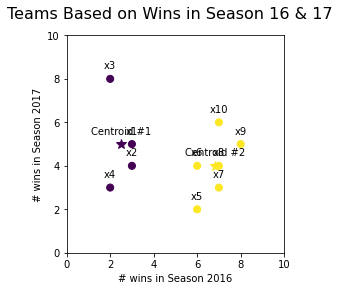

In [147]:
#@title Apply K-Means on teams to form two clusters

# Specify model parameters
distance_metric = 'manhattan'
max_iterations = 1000
centroid_initializations = [[3, 3], [8, 3]]

# Peform K-Means algorithm on data with specified parameters
clf = K_Means(k=2, distance_metric=distance_metric, tolerance=0.001, max_iterations=max_iterations, seed=None, centroid_initializations = centroid_initializations)
centroids, cluster_assignment = clf.fit(data)

# Print coordinates of the resulting centroids
print("Coordinates of the Centroids After {max_iterations} Iterations of the K-Means Algorithm \nUsing K = 2, {distance_metric} distance and centroid initializations: {centroid_initializations}:".format(max_iterations=max_iterations, distance_metric = distance_metric, centroid_initializations = centroid_initializations))
centroids_df = pd.DataFrame(data=centroids, index=['Centroid #1', 'Centroid #2']) 
centroids_df.columns =['# wins in Season 2016', '# wins in Season 2017']
print("")
print(centroids_df.round(0).astype(int))
print("")
print("___________________________________________________________________________________")

# plot the cluster and cluster's centroid
plt.scatter(data[:, 0], data[:, 1], s = 50, c = cluster_assignment, cmap = 'viridis')
centroid_1 = centroids_df.iloc[0]
centroid_2 = centroids_df.iloc[1]
plt.plot(centroid_1[0], centroid_1[1], marker='*', markersize=10, color="#440154ff")
plt.annotate("Centroid #1", # this is the text
                 (centroid_1[0],centroid_1[1]), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.plot(centroid_2[0], centroid_2[1], marker='*', markersize=10, color="#fde725ff")
plt.annotate("Centroid #2", # this is the text
                 (centroid_2[0],centroid_2[1]), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
                 # zip joins x and y coordinates in pairs

for label,x,y in zip(df.index, df['# wins in Season 2016'].values,df['# wins in Season 2017'].values):

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.ylim(0, 10)
plt.xlim(0, 10)
plt.gca().set_aspect('equal')
plt.suptitle("Teams Based on Wins in Season 16 & 17\n", fontsize=16)
plt.xlabel('# wins in Season 2016')
plt.ylabel('# wins in Season 2017')
plt.show();

In [148]:
#@title Report cluster assignments

kmeans_cluster_assignment = {'K-Means Cluster Assignment': cluster_assignment}
df_cluster_assignment = pd.DataFrame(data=kmeans_cluster_assignment, index=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10'])
df.index.name = 'Team'
print(df_cluster_assignment)

     K-Means Cluster Assignment
x1                            0
x2                            0
x3                            0
x4                            0
x5                            1
x6                            1
x7                            1
x8                            1
x9                            1
x10                           1


<!DOCTYPE html>
<html>
<body>

**<h3>(4) Initialize with two centroids, (3, 2) and (4, 8). Use Manhattan distance as the distance metric. First, perform one iteration of the K-means algorithm and report the coordinates of the resulting centroids. Second, please use K-Means to find two clusters.</h3>**

</body>
</html>

In [149]:
#@title Initialize with two centroids, (3, 2) and (4, 8). Use Manhattan distance as the distance metric. First, perform one iteration of the K-means algorithm and report the coordinates of the resulting centroids
# Specify model parameters
distance_metric = 'manhattan'
max_iterations = 1
centroid_initializations = [[3, 2], [4, 8]]

# Peform K-Means algorithm on data with specified parameters
clf = K_Means(k=2, distance_metric=distance_metric, tolerance=0.001, max_iterations=max_iterations, seed=None, centroid_initializations = centroid_initializations)
centroids, cluster_assignment = clf.fit(data)

# Print coordinates of the resulting centroids
print("Coordinates of the Centroids After {max_iterations} Iteration of the K-Means Algorithm Using K = 2, {distance_metric} distance and centroid initializations: {centroid_initializations}:".format(max_iterations=max_iterations, distance_metric = distance_metric, centroid_initializations = centroid_initializations))
centroids_df = pd.DataFrame(data=centroids, index=['Centroid #1', 'Centroid #2']) 
centroids_df.columns =['# wins in Season 2016', '# wins in Season 2017']
print("")
print(centroids_df.round(0).astype(int))

Coordinates of the Centroids After 1 Iteration of the K-Means Algorithm Using K = 2, manhattan distance and centroid initializations: [[3, 2], [4, 8]]:

             # wins in Season 2016  # wins in Season 2017
Centroid #1                      5                      4
Centroid #2                      6                      6


Coordinates of the Centroids After 1000 Iterations of the K-Means Algorithm 
Using K = 2, manhattan distance and centroid initializations: [[3, 2], [4, 8]]:

             # wins in Season 2016  # wins in Season 2017
Centroid #1                      5                      4
Centroid #2                      6                      6

___________________________________________________________________________________


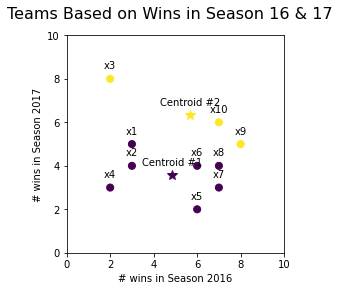

In [150]:
#@title Apply K-Means on teams to form two clusters

# Specify model parameters
distance_metric = 'manhattan'
max_iterations = 1000
centroid_initializations = [[3, 2], [4, 8]]

# Peform K-Means algorithm on data with specified parameters
clf = K_Means(k=2, distance_metric=distance_metric, tolerance=0.001, max_iterations=max_iterations, seed=None, centroid_initializations = centroid_initializations)
centroids, cluster_assignment = clf.fit(data)

# Print coordinates of the resulting centroids
print("Coordinates of the Centroids After {max_iterations} Iterations of the K-Means Algorithm \nUsing K = 2, {distance_metric} distance and centroid initializations: {centroid_initializations}:".format(max_iterations=max_iterations, distance_metric = distance_metric, centroid_initializations = centroid_initializations))
centroids_df = pd.DataFrame(data=centroids, index=['Centroid #1', 'Centroid #2']) 
centroids_df.columns =['# wins in Season 2016', '# wins in Season 2017']
print("")
print(centroids_df.round(0).astype(int))
print("")
print("___________________________________________________________________________________")

# plot the cluster and cluster's centroid
plt.scatter(data[:, 0], data[:, 1], s = 50, c = cluster_assignment, cmap = 'viridis')
centroid_1 = centroids_df.iloc[0]
centroid_2 = centroids_df.iloc[1]
plt.plot(centroid_1[0], centroid_1[1], marker='*', markersize=10, color="#440154ff")
plt.annotate("Centroid #1", # this is the text
                 (centroid_1[0],centroid_1[1]), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.plot(centroid_2[0], centroid_2[1], marker='*', markersize=10, color="#fde725ff")
plt.annotate("Centroid #2", # this is the text
                 (centroid_2[0],centroid_2[1]), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
                 # zip joins x and y coordinates in pairs

for label,x,y in zip(df.index, df['# wins in Season 2016'].values,df['# wins in Season 2017'].values):

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.ylim(0, 10)
plt.xlim(0, 10)
plt.gca().set_aspect('equal')
plt.suptitle("Teams Based on Wins in Season 16 & 17\n", fontsize=16)
plt.xlabel('# wins in Season 2016')
plt.ylabel('# wins in Season 2017')
plt.show();

In [151]:
#@title Report cluster assignments

kmeans_cluster_assignment = {'K-Means Cluster Assignment': cluster_assignment}
df_cluster_assignment = pd.DataFrame(data=kmeans_cluster_assignment, index=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10'])
df.index.name = 'Team'
print(df_cluster_assignment)

     K-Means Cluster Assignment
x1                            0
x2                            0
x3                            1
x4                            0
x5                            0
x6                            0
x7                            0
x8                            0
x9                            1
x10                           1




<!DOCTYPE html>
<html>
<body>

**<h2>Task 3 - There are two clusters A (red) and B (blue), each has four members and plotted in Figure. The coordinates of each member are labeled in the figure. Compute the distance between two clusters using Euclidean distance.</h2>**

**<h3>(A)  What is the distance between the two farthest members? (round to four decimal places here, and next 2 problems)</h3>**

**<h3>(B) What is the distance between the two closest members?</h3>**

**<h3>(C) What is the average distance between all pairs?</h3>**

**<h3>(D) Discuss which distance (A, B, C) is more robust to noises in this case?</h3>**
</body>
</html>

   Feature 1  Feature 2 Label
1        4.7        3.2     A
2        4.9        3.1     A
3        5.0        3.0     A
4        4.6        2.9     A
5        5.9        3.2     B
6        6.7        3.1     B
7        6.0        3.0     B
8        6.2        2.8     B


___________________________________________________________________________________


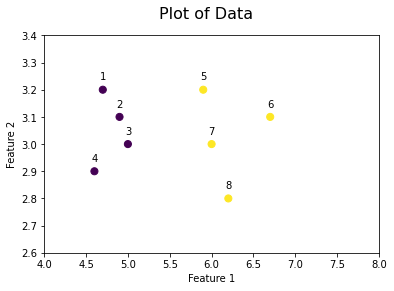

In [152]:
#@title Create, print, and plot data points

# Print multiple objects to screen in same shell 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

problem_3_data = {'Feature 1': [4.7, 4.9, 5.0, 4.6, 5.9, 6.7, 6.0, 6.2], 'Feature 2': [3.2, 3.1, 3.0, 2.9, 3.2, 3.1, 3.0, 2.8], 'Label': ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B']}
problem_3_df = pd.DataFrame(data=problem_3_data, index=['1', '2', '3', '4', '5', '6', '7', '8'])

problem_3_data = np.array([[4.7, 3.2],
              [4.9, 3.1],
              [5.0, 3.0],
              [4.6, 2.9],
              [5.9, 3.2],
              [6.7, 3.1],
              [6.0, 3.0],
              [6.2, 2.8]])

problem_3_target = problem_3_df['Label'].squeeze()
print(problem_3_df)
problem_3_df.loc[(problem_3_df['Label']=='A'),'Label']=0
problem_3_df.loc[problem_3_df['Label']=='B','Label']=1
problem_3_target = problem_3_df['Label'].to_numpy()
print("")

# Show df
#problem_3_df
print()

# Show df shape
#problem_3_df.shape

print("___________________________________________________________________________________")

# plot the cluster and cluster's centroid
plt.scatter(problem_3_data[:, 0], problem_3_data[:, 1], s = 50, c = problem_3_target, cmap = 'viridis')

for label,x,y in zip(problem_3_df.index, problem_3_df['Feature 1'].values,problem_3_df['Feature 2'].values):

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.ylim(2.6, 3.4)
plt.xlim(4, 8)
plt.suptitle("Plot of Data\n", fontsize=16)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show();



In [114]:
#@title Find the distance between two clusters
from sklearn.metrics.pairwise import euclidean_distances

# Specify model parameters
distance_metric = 'euclidean'
max_iterations = 1000
centroid_initializations = [[4.7, 3.0], [6.5, 3.1]]

data_points_in_cluster_A = problem_3_data[:4]
x = [p[0] for p in data_points_in_cluster_A]
y = [p[1] for p in data_points_in_cluster_A]
center_clusterA = (sum(x) / len(data_points_in_cluster_A), sum(y) / len(data_points_in_cluster_A))

data_points_in_cluster_B = problem_3_data[4:]
x = [p[0] for p in data_points_in_cluster_B]
y = [p[1] for p in data_points_in_cluster_B]
center_clusterB = (sum(x) / len(data_points_in_cluster_B), sum(y) / len(data_points_in_cluster_B))

# Print coordinates of the resulting centroids
print("Coordinates of the Centroids of Clusters A and B")
centers_for_A_and_B_clusters = pd.DataFrame([[center_clusterA[0], center_clusterA[1]], [center_clusterB[0], center_clusterB[1]]], columns=['Feature 1', 'Feature 2'], index=['Centroid #1', 'Centroid #2'])
print("")
print(centers_for_A_and_B_clusters.round(1))
print("")
print("___________________________________________________________________________________")

# Compute the distance between two clusters using Euclidean distance
euclidean_distance_problem_3 = np.linalg.norm(np.array(center_clusterA) - np.array(center_clusterB)) 
print("")
print("The Euclidean distance between the two clusters is {euclidean_distance_problem_3}".format(euclidean_distance_problem_3=euclidean_distance_problem_3.round(1)))
print("")


Coordinates of the Centroids of Clusters A and B

             Feature 1  Feature 2
Centroid #1        4.8        3.1
Centroid #2        6.2        3.0

___________________________________________________________________________________

The Euclidean distance between the two clusters is 1.4



In [153]:
#@title Find the distance between the two farthest members
X, y = problem_3_data, problem_3_target

n = len(problem_3_data)
maximum = 0

# Iterate over all possible pairs
for i in range(n):
  for j in range(i + 1, n):
    # Update maxm
    distance = np.linalg.norm(np.array(problem_3_data[i]) - np.array(problem_3_data[j]))
    maximum = max(maximum, distance)

print("The distance between the two farthest members are {maximum}".format(maximum = maximum.round(2)));



The distance between the two farthest members are 2.11


In [154]:
#@title Find the distance between the two closest members
X, y = problem_3_data, problem_3_target

n = len(problem_3_data)
minimum = 100.00

# Iterate over all possible pairs
for i in range(n):
  for j in range(i + 1, n):
    # Update minimum
    distance = np.linalg.norm(np.array(problem_3_data[i]) - np.array(problem_3_data[j]))
    minimum = min(minimum, distance)

print("The distance between the two farthest members are {minimum}".format(minimum = minimum.round(2)));

The distance between the two farthest members are 0.14


In [117]:
#@title Find the average distance between all pairs
X, y = problem_3_data, problem_3_target

n = len(problem_3_data)
list = []

# Iterate over all possible pairs
for i in range(n):
  for j in range(i + 1, n):
    # Update minimum
    distance = np.linalg.norm(np.array(problem_3_data[i]) - np.array(problem_3_data[j]))
    list.append(distance)

average_distance = np.mean(list)
print("The average distance between all pairs is {average_distance}".format(average_distance = average_distance.round(2)));

The average distance between all pairs is 0.98


In [118]:
#@title Discuss which distance (A, B, C) is more robust to noises in this case?

print("The distances between the two farthest or two closest data points are more")
print("robust to noises in this case. Assuming the data follows a Gaussian distribution,")
print("if the noisy data point is within one or two standard deviations from the mean")
print("then the noise would not impact the distances between the two farthest or two ")
print("closest data points because the distances between the noisy data and other data")
print("is likely smaller than the distance between the two farthest data points and")
print("greater than the distance between the two closest data points. However, the")
print("noisy data is likely to impact the average distance because they will always be")
print("incorporated into any average distance calculations.")

The distances between the two farthest or two closest data points are more
robust to noises in this case. Assuming the data follows a Gaussian distribution,
if the noisy data point is within one or two standard deviations from the mean
then the noise would not impact the distances between the two farthest or two 
closest data points because the distances between the noisy data and other data
is likely smaller than the distance between the two farthest data points and
greater than the distance between the two closest data points. However, the
noisy data is likely to impact the average distance because they will always be
incorporated into any average distance calculations.


<!DOCTYPE html>
<html>
<body>

**<h2>Task 2 K-Means Clustering with Real World Dataset: </h2>**

**<p>First, download the Iris data set from: https://archive.ics.uci.edu/ml/datasets/Iris. Then, implement the K-means algorithm. K-means algorithm computes the distance of a given data point pair. Replace the distance computation function with Euclidean distance, 1- Cosine
similarity, and 1 – the Generalized Jarcard similarity
(https://www.itl.nist.gov/div898/software/dataplot/refman2/auxillar/jaccard.htm).</p>**

**<h3>(1)  Run K-means clustering with Euclidean, Cosine and Jarcard similarity. Specify K= the number of categorical values of y (the variable of label). Compare the SSEs of Euclidean-Kmeans Cosine-K-means, Jarcard-K-means. Which method is better?.</h3>**

**<h3>(2) Compare the accuracies of Euclidean-K-means Cosine-K-means, Jarcard-K-means. First, label each cluster with the label of the highest votes. Later, compute the accuracy of the Kmeans with respect to the three similarity metrics. Which metric is better?.</h3>**

**<h3>(3) Which of Euclidean-K-means, Cosine-K-means, Jarcard-K-means requires more iterations and times?.</h3>**

**<h3>(4) Compare the SSEs of Euclidean-K-means Cosine-K-means, Jarcard-K-means with respect to the following three terminating conditions:</h3>**
* **when there is no change in centroid position**
* **when the SSE value increases in the next iteration**
* **when the maximum preset value (100) of iteration is complete**

**<h3>Which method requires more time or more iterations?</h3>**
</body>
</html>

<!DOCTYPE html>
<html>
<body>

**<h3>(1)  Run K-means clustering with Euclidean, Cosine and Jarcard similarity. Specify K= the number of categorical values of y (the variable of label). Compare the SSEs of Euclidean-Kmeans Cosine-K-means, Jarcard-K-means. Which method is better?.</h3>**

</body>
</html>

In [119]:
#@title Import Iris data set
from google.colab import files
uploaded = files.upload()

Saving iris.data to iris (2).data
Saving iris.names to iris (2).names


In [120]:
#@title Read train and test data sets
# read train datasets
data = pd.read_csv('iris.data')
data.columns =['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'class']
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [121]:
#@title Print features
print (data['class'].unique())
print (data['class'].value_counts().count())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
3


In [122]:
#@title Print number of training data
columns =['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
iris_data = data[columns]
iris_data = iris_data.to_numpy()

iris_target = pd.DataFrame(data['class'])
iris_target.loc[iris_target['class']=='Iris-setosa','class']=0
iris_target.loc[iris_target['class']=='Iris-versicolor','class']=1
iris_target.loc[iris_target['class']=='Iris-virginica','class']=2
iris_target = iris_target.to_numpy()

# Number of training data
n = iris_data.shape[0]
print('number of training data = {}'.format(n))
# Number of features in the data
c = iris_data.shape[1]
print('Number of features = {}'.format(c))


number of training data = 149
Number of features = 4


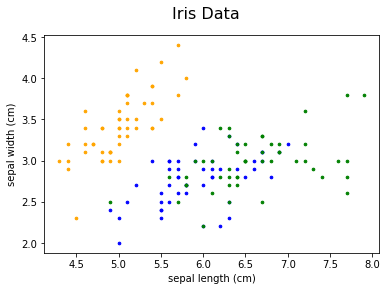

In [123]:
#@title Plot the data
colors=['orange', 'blue', 'green']
for i in range(n):
    plt.scatter(iris_data[i, 0], iris_data[i,1], s=7, color = colors[int(iris_target[i])])
plt.suptitle("Iris Data\n", fontsize=16)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show();

In [130]:
#@title Compute Euclidean SSE
clf = K_Means(k=3, distance_metric='euclidean', tolerance=0.001, max_iterations=1000, seed=None, centroid_initializations = None)
centroids, cluster_assignment = clf.fit(iris_data)

SSE = computeSSE(iris_data, cluster_assignment, centroids)
print(SSE)




78.923033172916


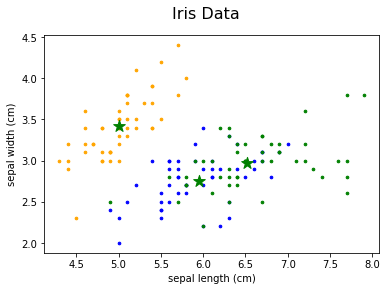

In [134]:
#@title Plot the Data
colors=['orange', 'blue', 'green']
for i in range(n):
    plt.scatter(iris_data[i, 0], iris_data[i,1], s=7, color = colors[int(iris_target[i])])
plt.scatter(centroids[:,0], centroids[:,1], marker='*', c='g', s=150)
plt.suptitle("Iris Data\n", fontsize=16)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show();

In [132]:
#@title Compute Cosine SSE
clf = K_Means(k=3, distance_metric='cosine', tolerance=0.001, max_iterations=1000, seed=None, centroid_initializations = None)
centroids, cluster_assignment = clf.fit(iris_data)

SSE = computeSSE(iris_data, cluster_assignment, centroids)
print(SSE)


84.38799085474415


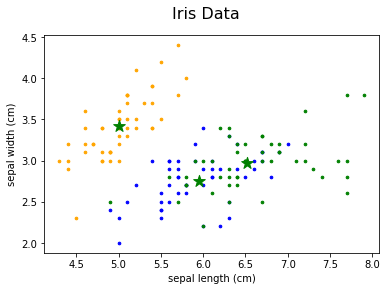

In [133]:
#@title Plot the Data
colors=['orange', 'blue', 'green']
for i in range(n):
    plt.scatter(iris_data[i, 0], iris_data[i,1], s=7, color = colors[int(iris_target[i])])
plt.scatter(centroids[:,0], centroids[:,1], marker='*', c='g', s=150)
plt.suptitle("Iris Data\n", fontsize=16)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show();

In [ ]:
#@title Compute Jiccard SSE
#clf = K_Means(k=3, distance_metric='jaccard', tolerance=0.001, max_iterations=1000, seed=None, centroid_initializations = None)
centroids, cluster_assignment = clf.fit(iris_data)

#SSE = computeSSE(iris_data, cluster_assignment, centroids)
#print(SSE)